# 针对亚马逊消费者数据的研究

随着互联网的普及和电子商务的迅速发展，消费者在线购物已经成为现代社会中不可或缺的一部分。亚马逊作为全球最大的电商平台之一，吸引了数以亿计的用户，其海量数据蕴含了丰富的信息，深入挖掘这些信息对于理解消费者行为、改进用户体验以及提升商业竞争力具有重要的意义。

### 研究意义与重要性

本研究旨在通过对亚马逊消费者行为的数据科学研究，揭示潜在的消费者趋势、购物习惯以及对商品的偏好，以为商家提供更精准的市场策略和个性化服务奠定基础。具体而言，研究将关注以下几个重要方面：

消费者特征分析： 通过对年龄、性别等因素的分析，了解不同人群在亚马逊平台上的购物行为，为个性化营销提供有力支持。

购物行为影响因素： 着眼于消费者放弃购物车的原因、商品评价的可靠性，深入挖掘这些因素对购物决策的影响，为商家提供改进服务的建议。

产品类别偏好： 分析消费者对不同产品类别的偏好程度，为商家调整库存、推荐系统提供指导。

用户体验改进： 通过了解消费者对搜索体验、产品推荐的满意度，为提升用户体验提供具体建议。

### 研究方法和内容

本研究将运用数据科学的方法，包括但不限于：

数据预处理： 对数据进行清洗、处理缺失值和异常值，确保后续分析的可靠性。

探索性数据分析（EDA）： 通过可视化和统计手段，深入挖掘数据分布、相关性等信息，为后续建模提供指导。

特征工程： 根据研究目标对数据进行特征构建，提取对模型有意义的信息。

机器学习模型应用： 利用机器学习算法，如逻辑回归、聚类分析等，建立对消费者行为的预测模型和群体分析。

模型评估和解释： 对模型进行评估，解释模型的预测能力和对业务问题的解释力。

通过以上方法，我们将能够深入理解亚马逊消费者行为的本质，为商家提供精准的市场分析、改进用户体验的建议，助力商业决策的科学化和精细化。

# 数据导入和预处理

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#Importing The Required Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
import warnings
import joblib
from joblib import load
from joblib import dump
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,ConfusionMatrixDisplay


导入所需的库和模块。numpy 和 pandas 用于数据处理，seaborn 和 matplotlib.pyplot 用于绘图，scikit-learn 中的不同模块用于机器学习任务，以及 xgboost 用于梯度提升。

In [2]:
df=pd.read_csv("Amazon Customer Behavior Survey.csv")
df

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023/06/12 4:02:02 PM GMT+5:30,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,2023/06/12 4:02:53 PM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,2023/06/12 4:03:59 PM GMT+5:30,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,2023/06/12 9:57:20 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy


计算每列中的缺失值数量。

In [3]:
df.isna().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

显示数据框中每列的数据类型。

In [4]:
df.dtypes

Timestamp                                 object
age                                        int64
Gender                                    object
Purchase_Frequency                        object
Purchase_Categories                       object
Personalized_Recommendation_Frequency     object
Browsing_Frequency                        object
Product_Search_Method                     object
Search_Result_Exploration                 object
Customer_Reviews_Importance                int64
Add_to_Cart_Browsing                      object
Cart_Completion_Frequency                 object
Cart_Abandonment_Factors                  object
Saveforlater_Frequency                    object
Review_Left                               object
Review_Reliability                        object
Review_Helpfulness                        object
Personalized_Recommendation_Frequency      int64
Recommendation_Helpfulness                object
Rating_Accuracy                            int64
Shopping_Satisfactio

删除了 Timestamp 列，因为时间戳对于聚类任务可能没有太大的帮助。

In [5]:
df.drop(['Timestamp'],inplace=True,axis=1)
df

,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,Yes,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,Maybe,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,Yes,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,Maybe,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,Maybe,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,Maybe,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,Yes,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy


删除了数据框中的任何包含缺失值的行，并创建了数据框的一个副本 df1，以备将来进行聚类。

In [6]:
df=df.dropna()
df1=df.copy()#copying df for clustering
df.isna().sum()

age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     0
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas                         0
dtype: int64

将年龄划分为不同的类别，将其放入名为 "age" 的新列中。

In [7]:
#splliting age in to different catogories
bins = [0, 20, 30, 40, 50, float('inf')]
labels = ['15-25', '25-35', '35-45', '45-55', '55+']

# Create a new column 'Age Category' with the grouped age categories
df["age"] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [8]:
df.dtypes

age                                       category
Gender                                      object
Purchase_Frequency                          object
Purchase_Categories                         object
Personalized_Recommendation_Frequency       object
Browsing_Frequency                          object
Product_Search_Method                       object
Search_Result_Exploration                   object
Customer_Reviews_Importance                  int64
Add_to_Cart_Browsing                        object
Cart_Completion_Frequency                   object
Cart_Abandonment_Factors                    object
Saveforlater_Frequency                      object
Review_Left                                 object
Review_Reliability                          object
Review_Helpfulness                          object
Personalized_Recommendation_Frequency        int64
Recommendation_Helpfulness                  object
Rating_Accuracy                              int64
Shopping_Satisfaction          

使用 LabelEncoder 对一些分类特征进行编码，使其变成可供模型使用的数字。

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=["age","Gender","Purchase_Categories","Purchase_Frequency","Personalized_Recommendation_Frequency","Recommendation_Helpfulness","Browsing_Frequency","Product_Search_Method","Search_Result_Exploration","Add_to_Cart_Browsing","Cart_Completion_Frequency","Cart_Abandonment_Factors","Saveforlater_Frequency","Review_Left","Review_Reliability","Review_Helpfulness","Service_Appreciation","Improvement_Areas"]
for i in lst:
  df[i]=le.fit_transform(df[i])

In [10]:
df.dtypes

age                                       int32
Gender                                    int32
Purchase_Frequency                        int32
Purchase_Categories                       int32
Personalized_Recommendation_Frequency     int32
Browsing_Frequency                        int32
Product_Search_Method                     int32
Search_Result_Exploration                 int32
Customer_Reviews_Importance               int64
Add_to_Cart_Browsing                      int32
Cart_Completion_Frequency                 int32
Cart_Abandonment_Factors                  int32
Saveforlater_Frequency                    int32
Review_Left                               int32
Review_Reliability                        int32
Review_Helpfulness                        int32
Personalized_Recommendation_Frequency     int64
Recommendation_Helpfulness                int32
Rating_Accuracy                           int64
Shopping_Satisfaction                     int64
Service_Appreciation                    

# 基本分析

计算数据框中特征之间的相关性，并打印高度相关的特征对。

In [11]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Find features with high correlation
threshold = 0.5  # Adjust the threshold as needed
highly_correlated_features = np.where(np.abs(correlation_matrix) > threshold)

# Print the highly correlated features
for feature1, feature2 in zip(highly_correlated_features[0], highly_correlated_features[1]):
    if feature1 != feature2:
        print(f"{df.columns[feature1]} and {df.columns[feature2]} are highly correlated.")

Rating_Accuracy  and Shopping_Satisfaction are highly correlated.
Shopping_Satisfaction and Rating_Accuracy  are highly correlated.


类似上面的代码，计算低相关性的特征对。

In [12]:
#Calculate the correlation matrix
correlation_matrix = df.corr()

# Find features with low correlation
threshold = 0.0009  # Adjust the threshold as needed
low_correlated_features = np.where(np.abs(correlation_matrix) < threshold)

# Print the low correlated features
for feature1, feature2 in zip(low_correlated_features[0], low_correlated_features[1]):
    if feature1 != feature2:
        print(f"{df.columns[feature1]} and {df.columns[feature2]} are low correlated.")

Browsing_Frequency and Shopping_Satisfaction are low correlated.
Shopping_Satisfaction and Browsing_Frequency are low correlated.


使用热力图可视化整个数据框中特征之间的相关性。

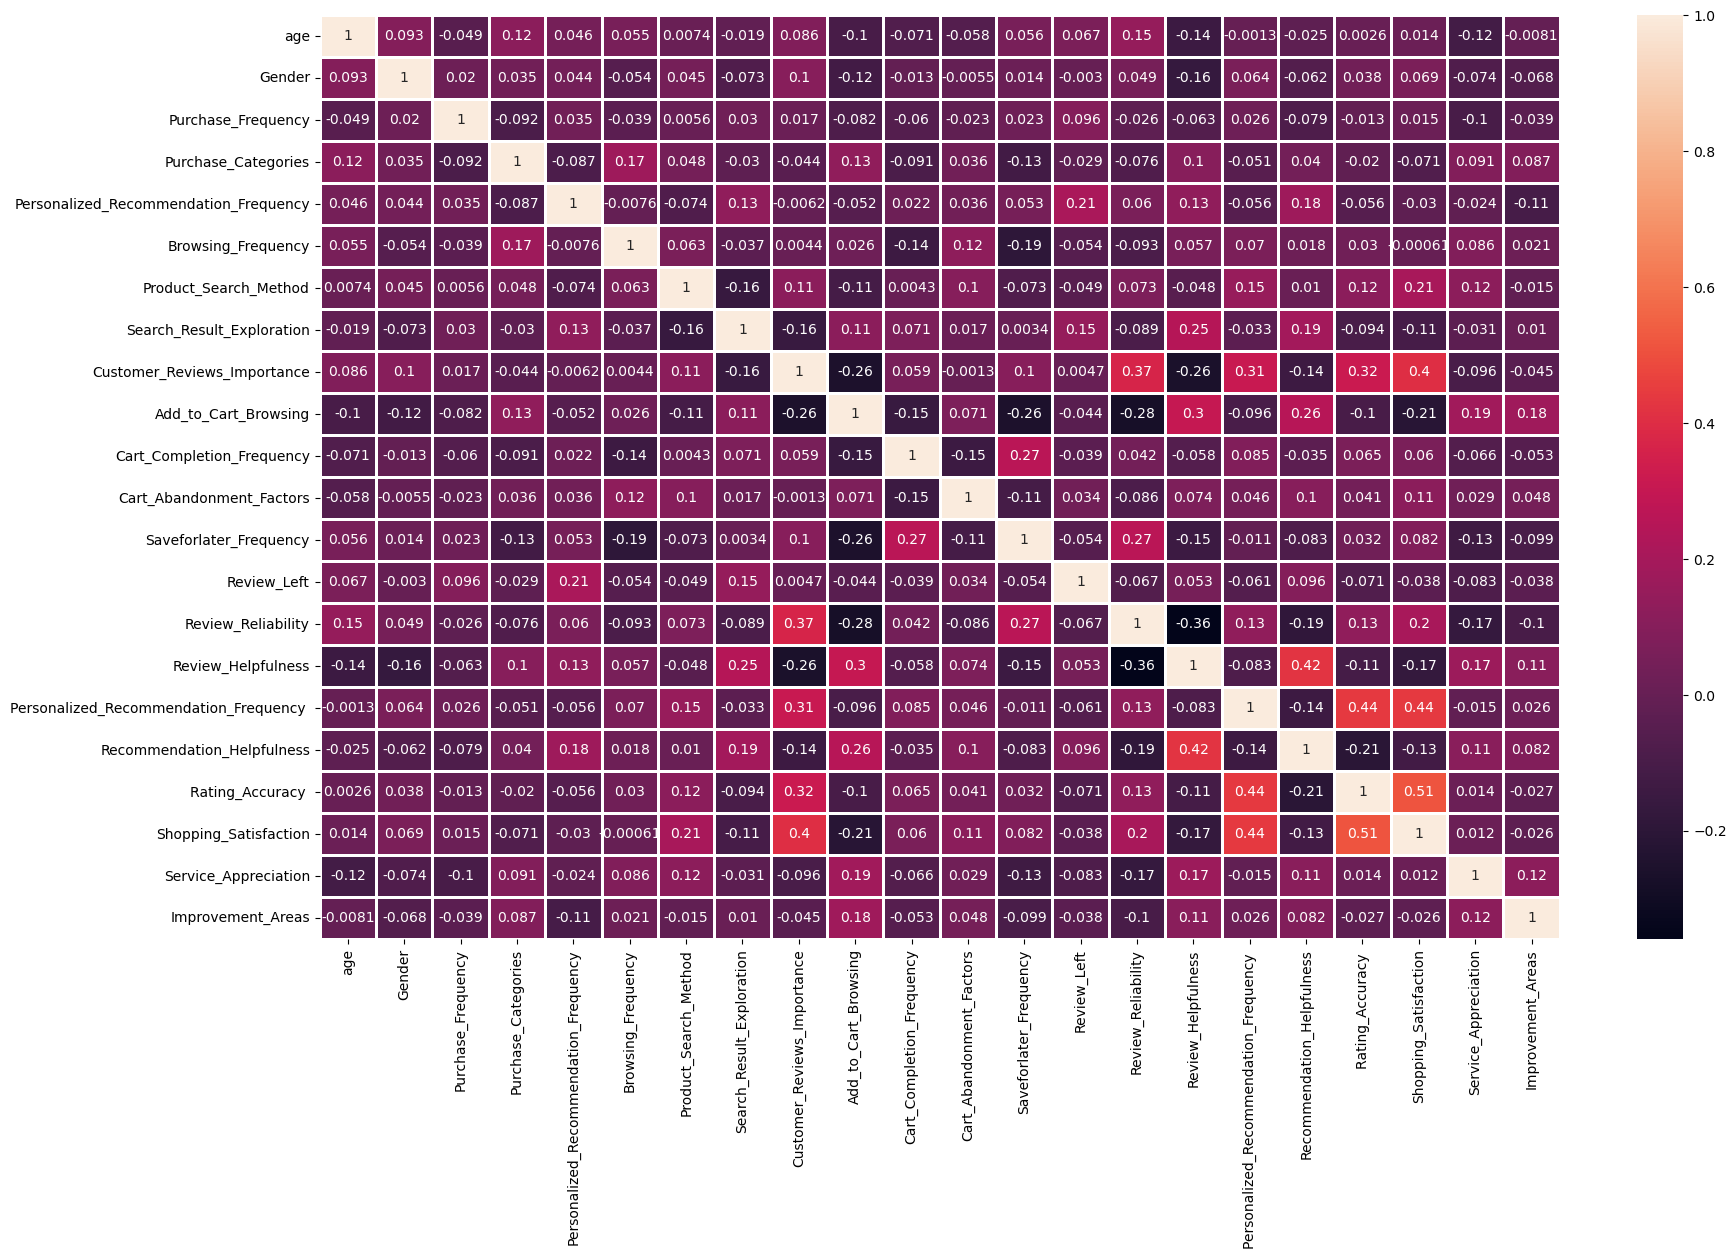

In [13]:
#correlation between variables
#heat map
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(20,12))
sns.heatmap(df.corr(),annot=True,linewidths=1)
plt.show()

<Axes: xlabel='Review_Reliability', ylabel='count'>

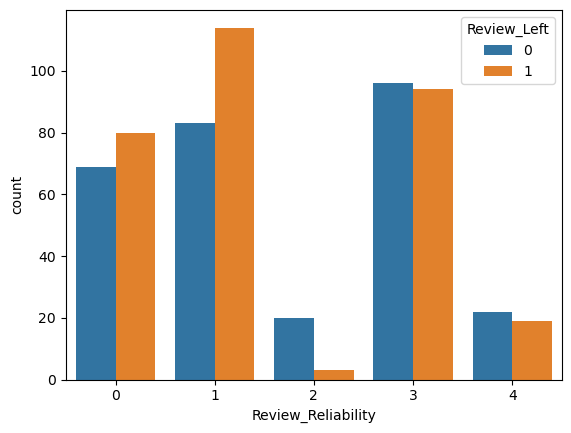

In [14]:
sns.countplot(x='Review_Reliability',data=df,hue='Review_Left')

使用饼图可视化了年龄的分布。

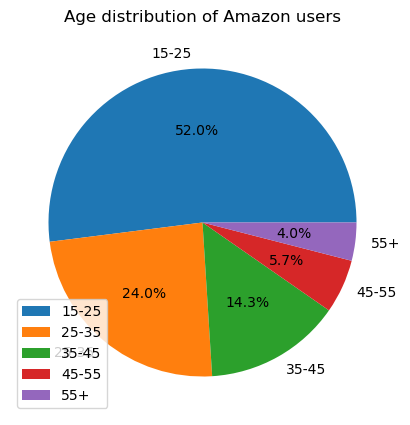

In [15]:
# Age distribution
y=df['age'].value_counts()
plt.figure(figsize=(5,5))
labels=['15-25', '25-35', '35-45', '45-55', '55+']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Age distribution of Amazon users')
plt.show()

使用计数图可视化了购买频率和性别之间的关系。

# 业务问题

在对数据进行基本分析后，我们可以尝试利用数据分析一些实际的业务问题。

## 1.大部分顾客的年龄段？

首先绘制一个条形图，横轴是年龄 ('age')，纵轴是每个年龄对应的顾客数量。
通过 order 参数，按照顾客数量的降序排列年龄，以确保图表更清晰。

<Axes: xlabel='age', ylabel='count'>

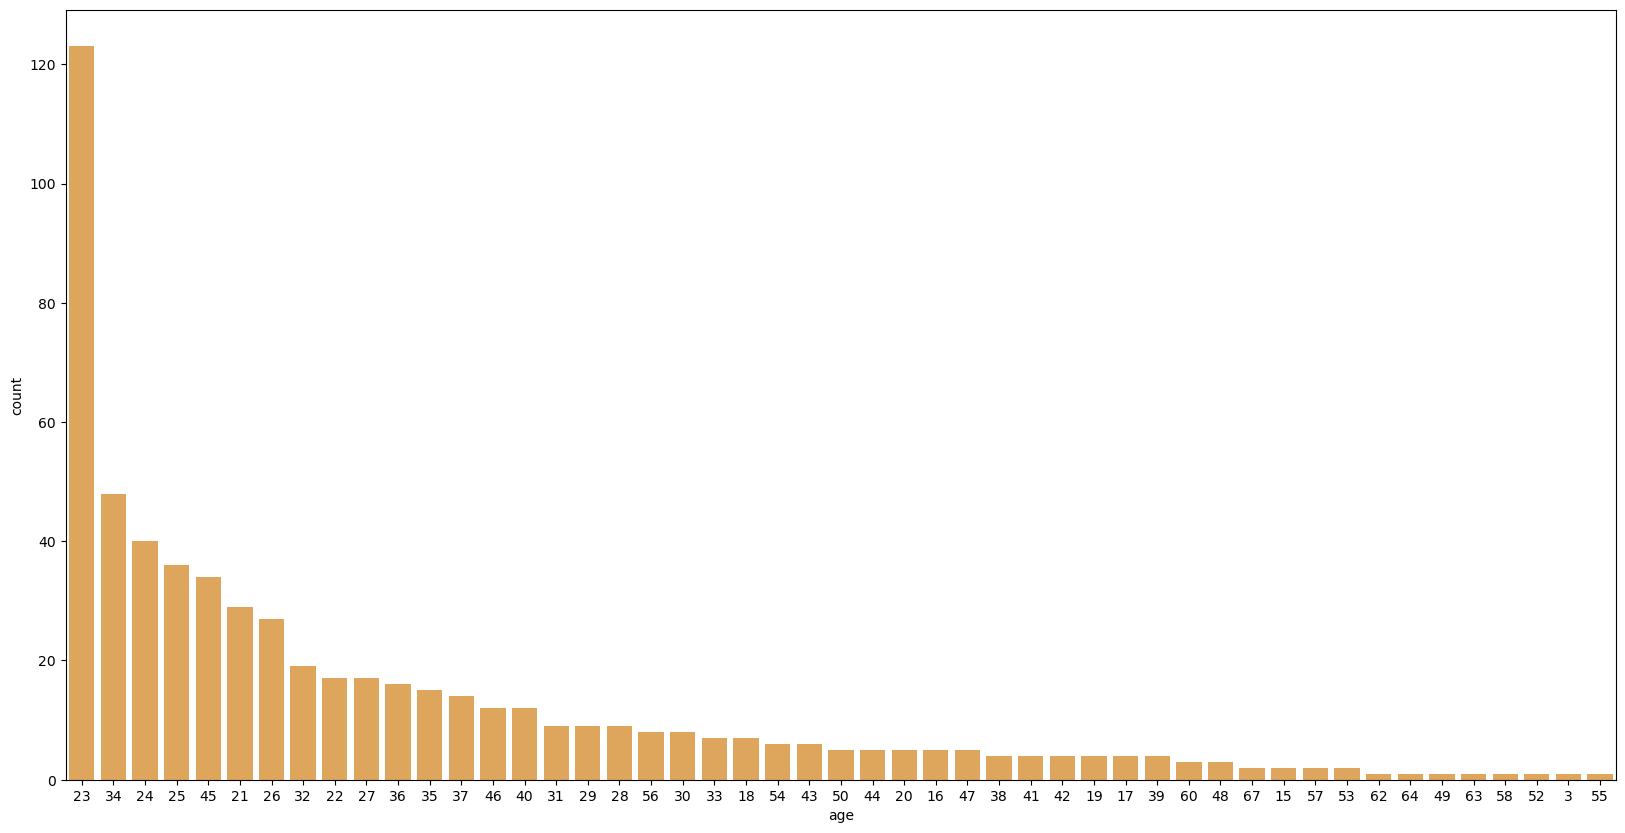

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(x='age', order = df1['age'].value_counts().index[0:-1],palette =['#f3a847'],data = df1)

绘制一个直方图，横轴是年龄 ('age')，纵轴是对应年龄值的频数。
直方图主要用于展示年龄分布的形状和集中趋势。

(array([  1.,   3.,  71., 252., 100.,  69.,  66.,  18.,  15.,   5.]),
 array([ 3. ,  9.4, 15.8, 22.2, 28.6, 35. , 41.4, 47.8, 54.2, 60.6, 67. ]),
 <BarContainer object of 10 artists>)

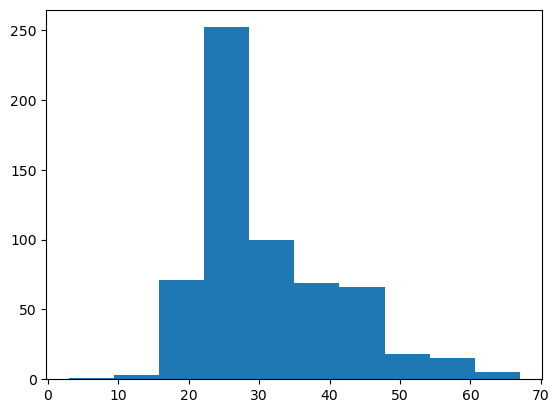

In [17]:
df['age'].mode()
plt.hist(data=df1,x='age')

主要年龄群体： 从图表中可以观察到，年龄为 '23' 的消费者数量最多，是主要的年龄群体。

其他主要年龄： 其他高频年龄包括 34、24、25 等。

主要消费者年龄范围： 年龄在 20 到 40 岁之间的群体是主要的消费者群体。这个范围内的年龄段人数较多，可能是市场中的关键目标受众。

有助于了解消费者年龄分布的主要趋势和特征，为进一步的市场分析和定向营销提供了基础。

## 影响顾客放弃购买的最常见因素是什么？

获取购物车放弃因素按频率降序排列的索引，确保图表按照频率降序展示。

<Axes: xlabel='Cart_Abandonment_Factors', ylabel='count'>

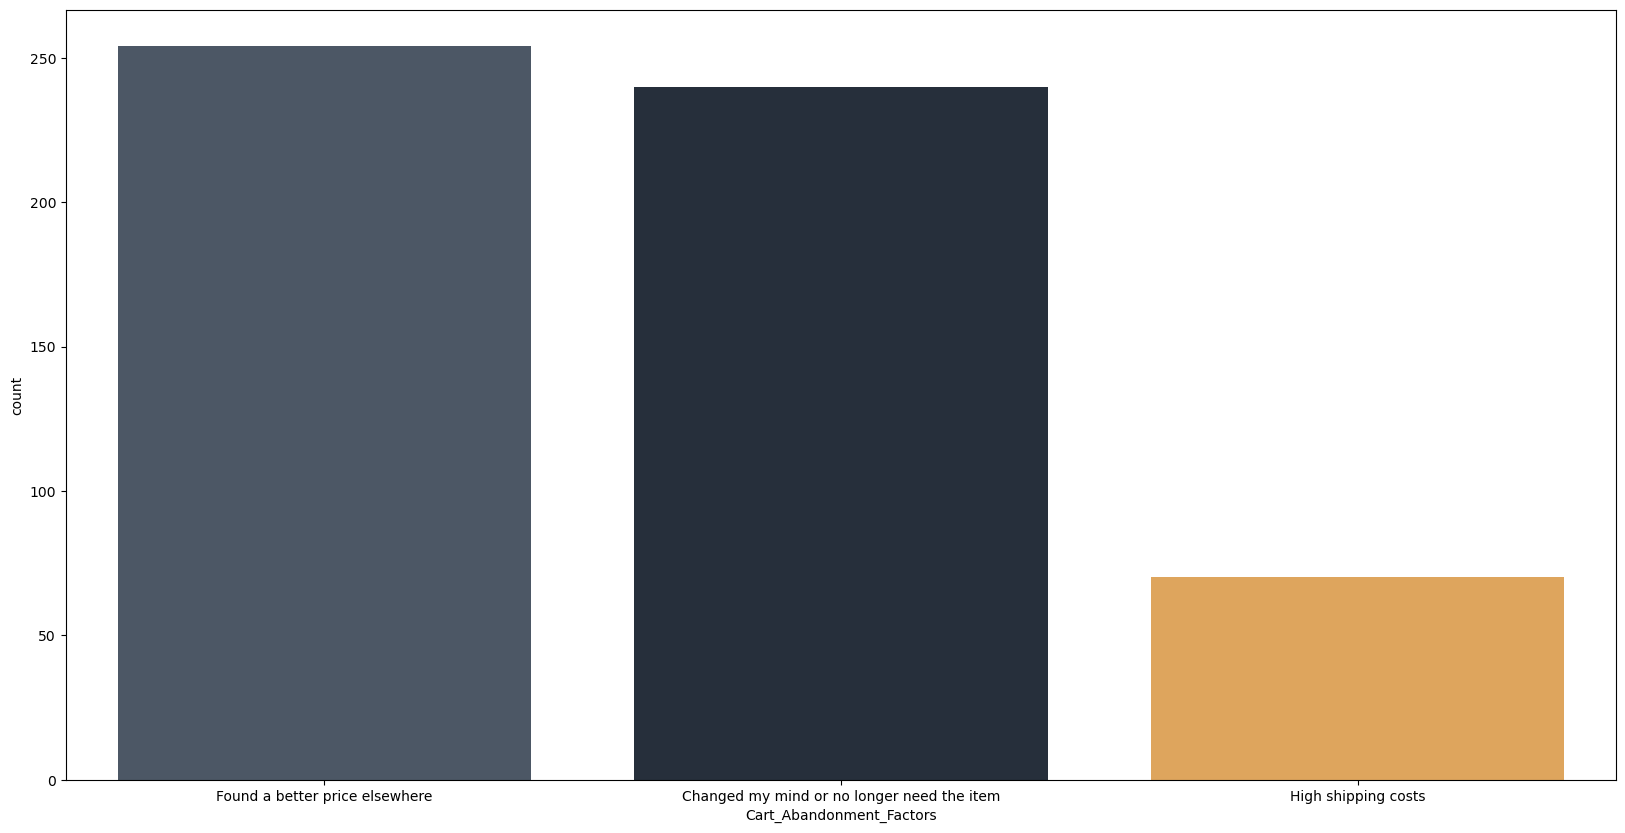

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(x='Cart_Abandonment_Factors', order = df1['Cart_Abandonment_Factors'].value_counts().index[0:-1],palette =['#485769','#232f3e','#f3a847'],data = df1)

根据图表的观察和先前的代码解释：

最常见的购物车放弃因素： 通过图表，我们可以清晰地看到“Found a better price elsewhere”（在其他地方找到更好的价格）是最常见的购物车放弃因素。

解决方案建议： 针对这一问题，提出了两种解决方案：

提供具有竞争力的价格，以降低顾客在其他网站上寻找更好价格的动机。
提供购物时的附加福利，例如优惠券或返现，以增加购物在本网站的吸引力。
这些建议的目标是降低购物车放弃率，提高顾客在该平台完成购物的可能性。这种分析有助于指导业务策略，以改善购物体验并提高销售转化率。

# 聚类

这里我们对数据进行聚类分析，分析性别与购买商品种类之间的关系。结果展示了数据在 'Gender' 和 'Purchase_Categories' 上的聚类情况。看到数据点在图上分成了三个区域，不同颜色的点表示它们属于不同的聚类，那么说明 K-Means 算法在这两个特征上将数据成功地分为三个簇。这有助于观察到数据中的一些模式或群集。

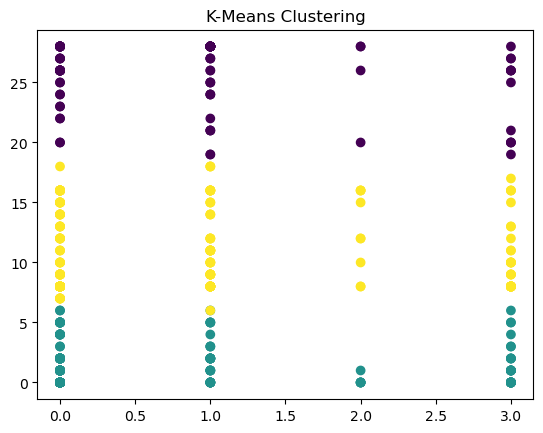

In [19]:
# 使用 K-Means 聚类
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

# 得到每个数据点的聚类标签
labels = kmeans.labels_

# 添加聚类标签到数据框
X_clustered = df.copy()
X_clustered['Cluster'] = labels

# 可视化聚类结果
plt.scatter(X_clustered['Gender'], X_clustered['Purchase_Categories'], c=labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

# 模型构建

## 这里最后我们尝试分析性别对在Amazon上购买频率的影响。

在正式开始构建模型之前，首先分析一下一些浅显的特征。

比如购买的商品的种类,可以从图中看到，购买最多的是化妆品和衣物类。这可以让我们先对结果产生一个基本的预期。后续我们可以再通过数据分析和模型去验证我们的预期是否符合实际。

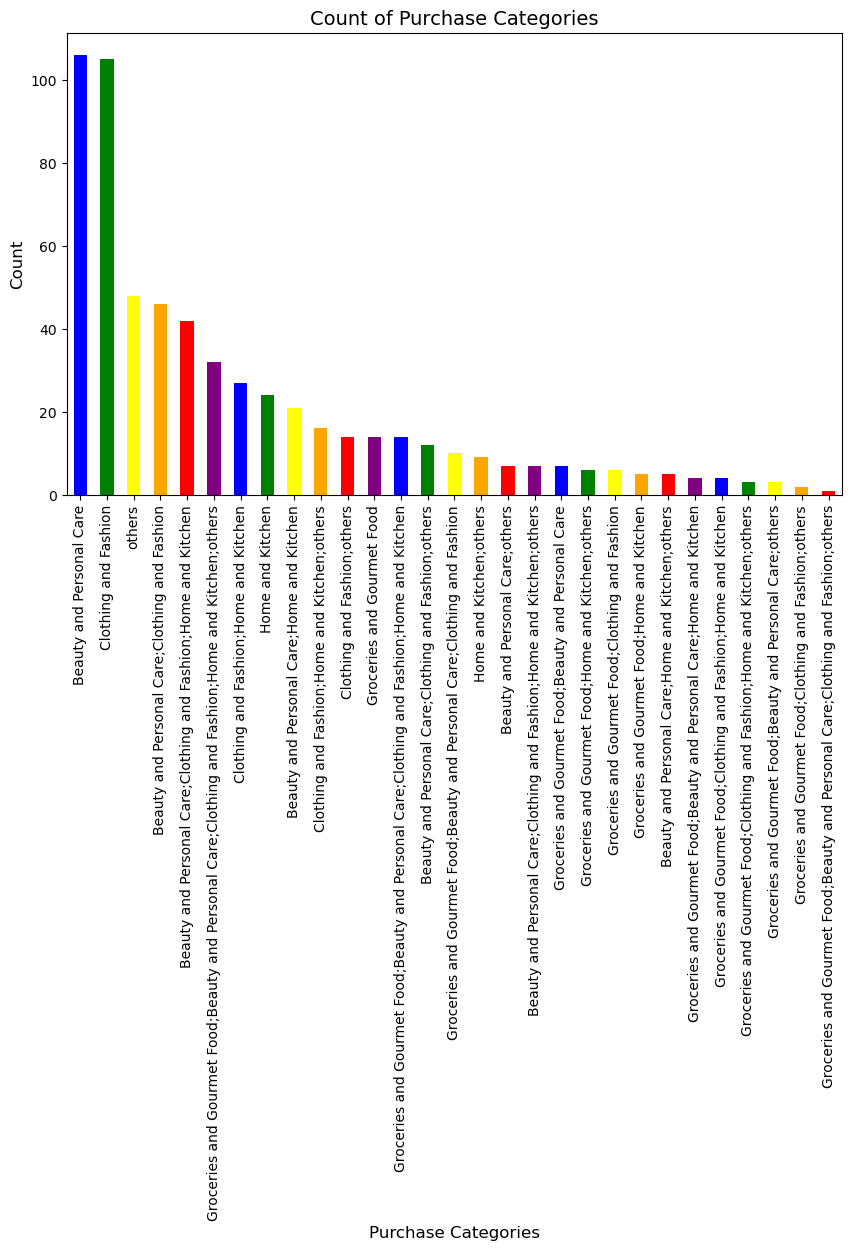

In [20]:
# Bar chart of purchase categories
purchase_counts = df1['Purchase_Categories'].value_counts()
colors = ['blue', 'green','yellow', 'orange', 'red', 'purple']
plt.figure(figsize=(10, 6))
purchase_counts.plot(kind='bar', color=colors)
plt.xlabel('Purchase Categories', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Purchase Categories', fontsize=14)
plt.show()

接下来我们分析一下消费者的购买频率

In [21]:
unique_counts = df1['Purchase_Frequency'].value_counts()
print(unique_counts)

Purchase_Frequency
Few times a month         202
Less than once a month    124
Once a week               112
Once a month              106
Multiple times a week      56
Name: count, dtype: int64


在对现有相关数据有了一定了解后，现在我们可以正式开始构建模型了。

In [22]:
# 创建特征变量和目标变量
X = df[['Gender']]
y_frequency = df['Purchase_Frequency']
y_categories = df['Purchase_Categories']

# 划分训练集和测试集
X_train, X_test, y_train_frequency, y_test_frequency = train_test_split(X, y_frequency, test_size=0.2, random_state=42)
X_train, X_test, y_train_categories, y_test_categories = train_test_split(X, y_categories, test_size=0.2, random_state=42)

# 构建逻辑回归模型
model_frequency = LogisticRegression()
model_categories = LogisticRegression()

# 训练模型
model_frequency.fit(X_train, y_train_frequency)
model_categories.fit(X_train, y_train_categories)

# 在测试集上进行预测
y_pred_frequency = model_frequency.predict(X_test)
y_pred_categories = model_categories.predict(X_test)

# 模型评估
accuracy_frequency = accuracy_score(y_test_frequency, y_pred_frequency)
accuracy_categories = accuracy_score(y_test_categories, y_pred_categories)

print("购买频率的准确性:", accuracy_frequency)
print("购买种类的准确性:", accuracy_categories)

# 分类报告
print("购买频率的分类报告:\n", classification_report(y_test_frequency, y_pred_frequency))
print("购买种类的分类报告:\n", classification_report(y_test_categories, y_pred_categories))

购买频率的准确性: 0.35
购买种类的准确性: 0.175
购买频率的分类报告:
               precision    recall  f1-score   support

           0       0.35      1.00      0.52        42
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        24

    accuracy                           0.35       120
   macro avg       0.07      0.20      0.10       120
weighted avg       0.12      0.35      0.18       120

购买种类的分类报告:
               precision    recall  f1-score   support

           0       0.18      0.90      0.30        20
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         1
           8       0.15

这样我们就完成了对模型的构建。构建了两个逻辑回归模型，分别用于预测购买频率（Purchase_Frequency）和购买种类（Purchase_Categories）。这样就可以基于性别（'Gender'）这一特征来预测用户的购买频率和购买种类，有助于了解性别与购买行为之间的关系，并可以用于制定相关的市场营销策略或个性化推荐。

通过对亚马逊消费者行为的深入研究，本研究旨在为电商平台运营商提供有力的数据支持和深刻的市场洞察。通过对海量用户数据的挖掘和分析，我们揭示了消费者在在线购物过程中的种种习惯和偏好，为商家制定更加精准的市场策略提供了深入洞察。

我们的研究不仅聚焦于消费者的年龄、性别、购物频率等基本特征，更关注了对购物行为的影响因素，产品类别的偏好趋势，以及对用户体验的改进空间。这些信息对于提高购物平台的用户满意度、提升商品销售效率以及改进服务体验具有积极的推动作用。

在本研究中，我们应用了数据科学的先进方法，包括数据清洗、特征工程、机器学习等，以更全面、系统的视角解析了亚马逊消费者的多维行为。通过构建模型和分析结果，我们不仅帮助商家更好地了解了其用户，还为未来决策提供了可靠的依据。

最终，本研究的成果不仅仅是对亚马逊消费者行为的深刻理解，更是对电商行业整体运营提出的可行性建议。我们期望这些发现能够激发更多关于电商数据的研究，促进数据科学在商业决策中的广泛应用，为电商行业的可持续发展贡献力量。